In [1]:
# Imports
%matplotlib inline

import sys
import numpy as np
import scipy
import scipy.stats as stats
from scipy.stats import binom
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style('darkgrid')
np.random.seed(4)

In [194]:
class DataAnalysis:
    def __init__(self, T, r, distribution, time_variation):
        self.T = T
        self.r = r
        self.real_rewards = np.zeros(self.T)
        self.rewards = np.zeros(self.T)
        self.running_avg = np.zeros(self.T)
        self.distribution = distribution
        self.time_variation = time_variation
    
    def generate_one_sample(self,t):
        if (self.distribution == 'Binomial'):
            return np.random.binomial(1,self.real_rewards[t])
        if (self.distribution == 'Gaussian'):
            return np.random.normal(self.real_rewards[t], 0.05, 1)
        
    def change_reward(self):
        for t in range(self.T):
            if(self.time_variation == 'step'):
                #if((t+1)%self.p == 0):
                    #self.r = np.random.randint(1,100)/100
                self.real_rewards[t] = self.r[(math.floor(t/(self.T/len(self.r))))]
            elif(self.time_variation == 'pos_log'):
                self.real_rewards[t] = self.r[(math.floor(t/(self.T/len(self.r))))] + (np.log(t+1))/(2*np.log(self.T))
            elif(self.time_variation == 'neg_log'):
                self.real_rewards[t] = self.r[(math.floor(t/(self.T/len(self.r))))] - (np.log(t+1))/(2*np.log(self.T))
    
    def generate_samples(self):
        self.change_reward()
        for t in range(self.T):
            outcome = self.generate_one_sample(t)
            self.rewards[t] = outcome
            self.running_avg[t] = np.sum(self.rewards) / (t+1)
        
    
    def plot_average(self):
        if(self.distribution=='Binomial'):
            plt.plot(self.real_rewards, 'r', label='Real Positive Reward Probability')
        if(self.distribution=='Gaussian'):
            plt.plot(self.real_rewards, 'r', label='Mean of the Gaussian')
        plt.plot(self.running_avg, 'b', label='Estimated Rewards Distribution')
        plt.title(self.distribution)
        plt.ylim([0, 1])
        plt.ylabel('Rewards')
        plt.xlabel('iterations')
        plt.legend()
        plt.show()        

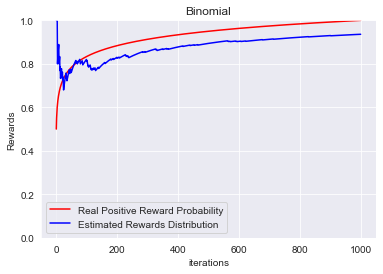

In [199]:
da = DataAnalysis(1000, [0.5], 'Binomial', 'pos_log')
da.generate_samples()
#[0.2, 0.25, 0.28, 0.3, 0.5, 0.31, 0.2, 0.36, 0.3, 0.4, 0.5, 0.55, 0.7, 0.69, 0.1, 0.7, 0.4, 0.5, 0.48, 0.47]
da.plot_average()